# State Data Revisted

<img src="images/all_states_lrg.png"/>

We will be revisiting the "state" dataset from one of the optional problems in Unit 2. This dataset has, for each of the fifty U.S. states, the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to, region the state belongs to, and two-letter abbreviation. This dataset comes from the U.S. Department of Commerce, Bureau of the Census.

Load the dataset into R and convert it to a data frame by running the following two commands in R:

    data(state)

    statedata = data.frame(state.x77)

If you can't access the state dataset in R, here is a CSV file with the same data that you can load into R using the read.csv function: statedataSimple.csv.  Be sure to call the output of the read.csv function "statedata".

After you have loaded the data into R, inspect the data set using the command: str(statedata)

### The Data

This dataset has 50 observations (one for each US state) and the following 8 variables:

    Population - the population estimate of the state in 1975
    
    Income - per capita income in 1974
    
    Illiteracy - illiteracy rates in 1970, as a percent of the population
    
    Life.Exp - the life expectancy in years of residents of the state in 1970
    
    Murder - the murder and non-negligent manslaughter rate per 100,000 population in 1976 
    
    HS.Grad - percent of high-school graduates in 1970
    
    Frost - the mean number of days with minimum temperature below freezing from 1931–1960 in the capital or a large city of the state
    
    Area - the land area (in square miles) of the state

We will try to build a model for life expectancy using regression trees, and employ cross-validation to improve our tree's performance.

### Load and Exploration the Data

In [1]:
data(state)

statedata = cbind(data.frame(state.x77), state.abb, state.area, state.center,  state.division, state.name, state.region)


head(statedata)

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
California,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766,CO,104247,-105.5130,38.6777,Mountain,Colorado,West


In [2]:
str(statedata)

'data.frame':	50 obs. of  15 variables:
 $ Population    : num  3615 365 2212 2110 21198 ...
 $ Income        : num  3624 6315 4530 3378 5114 ...
 $ Illiteracy    : num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Life.Exp      : num  69 69.3 70.5 70.7 71.7 ...
 $ Murder        : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ HS.Grad       : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ Frost         : num  20 152 15 65 20 166 139 103 11 60 ...
 $ Area          : num  50708 566432 113417 51945 156361 ...
 $ state.abb     : Factor w/ 50 levels "AK","AL","AR",..: 2 1 4 3 5 6 7 8 9 10 ...
 $ state.area    : num  51609 589757 113909 53104 158693 ...
 $ x             : num  -86.8 -127.2 -111.6 -92.3 -119.8 ...
 $ y             : num  32.6 49.2 34.2 34.7 36.5 ...
 $ state.division: Factor w/ 9 levels "New England",..: 4 9 8 5 9 8 1 3 3 3 ...
 $ state.name    : Factor w/ 50 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ state.region  : Factor w/ 4 levels "

In [3]:
summary(statedata)

   Population        Income       Illiteracy       Life.Exp    
 Min.   :  365   Min.   :3098   Min.   :0.500   Min.   :67.96  
 1st Qu.: 1080   1st Qu.:3993   1st Qu.:0.625   1st Qu.:70.12  
 Median : 2838   Median :4519   Median :0.950   Median :70.67  
 Mean   : 4246   Mean   :4436   Mean   :1.170   Mean   :70.88  
 3rd Qu.: 4968   3rd Qu.:4814   3rd Qu.:1.575   3rd Qu.:71.89  
 Max.   :21198   Max.   :6315   Max.   :2.800   Max.   :73.60  
                                                               
     Murder          HS.Grad          Frost             Area       
 Min.   : 1.400   Min.   :37.80   Min.   :  0.00   Min.   :  1049  
 1st Qu.: 4.350   1st Qu.:48.05   1st Qu.: 66.25   1st Qu.: 36985  
 Median : 6.850   Median :53.25   Median :114.50   Median : 54277  
 Mean   : 7.378   Mean   :53.11   Mean   :104.46   Mean   : 70736  
 3rd Qu.:10.675   3rd Qu.:59.15   3rd Qu.:139.75   3rd Qu.: 81163  
 Max.   :15.100   Max.   :67.30   Max.   :188.00   Max.   :566432  
            

### Problem 1.1 - Linear Regression Models
Let's recreate the linear regression models we made in the previous homework question. First, predict Life.Exp using all of the other variables as the independent variables (Population, Income, Illiteracy, Murder, HS.Grad, Frost, Area ). Use the entire dataset to build the model.

What is the adjusted R-squared of the model?

In [4]:
# Linear Regression
linReg = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata)
summary(linReg)


Call:
lm(formula = Life.Exp ~ Population + Income + Illiteracy + Murder + 
    HS.Grad + Frost + Area, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48895 -0.51232 -0.02747  0.57002  1.49447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.094e+01  1.748e+00  40.586  < 2e-16 ***
Population   5.180e-05  2.919e-05   1.775   0.0832 .  
Income      -2.180e-05  2.444e-04  -0.089   0.9293    
Illiteracy   3.382e-02  3.663e-01   0.092   0.9269    
Murder      -3.011e-01  4.662e-02  -6.459 8.68e-08 ***
HS.Grad      4.893e-02  2.332e-02   2.098   0.0420 *  
Frost       -5.735e-03  3.143e-03  -1.825   0.0752 .  
Area        -7.383e-08  1.668e-06  -0.044   0.9649    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7448 on 42 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.6922 
F-statistic: 16.74 on 7 and 42 DF,  p-value: 2.534e-10


Answer: Adjusted R-squared:  0.6922

### Problem 1.2 - Linear Regression Models
Calculate the sum of squared errors (SSE) between the predicted life expectancies using this model and the actual life expectancies:

In [5]:
# Make Predictions
pred = predict(linReg)

# Sum of Squared Errors
sse = sum((pred - statedata$Life.Exp)^2)
round(sse,4)

[1] 23.2971

In [6]:
# Alternatively
s = sum(linReg$residuals^2)
round(s,4)

[1] 23.2971

### Problem 1.3 - Linear Regression Models
Build a second linear regression model using just Population, Murder, Frost, and HS.Grad as independent variables (the best 4 variable model from the previous homework). What is the adjusted R-squared for this model?

In [7]:
# Linear Regression with the best 4 variable
linReg2 = lm(Life.Exp ~ Population + Murder + HS.Grad + Frost, data=statedata)
summary(linReg2)


Call:
lm(formula = Life.Exp ~ Population + Murder + HS.Grad + Frost, 
    data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47095 -0.53464 -0.03701  0.57621  1.50683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.103e+01  9.529e-01  74.542  < 2e-16 ***
Population   5.014e-05  2.512e-05   1.996  0.05201 .  
Murder      -3.001e-01  3.661e-02  -8.199 1.77e-10 ***
HS.Grad      4.658e-02  1.483e-02   3.142  0.00297 ** 
Frost       -5.943e-03  2.421e-03  -2.455  0.01802 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7197 on 45 degrees of freedom
Multiple R-squared:  0.736,	Adjusted R-squared:  0.7126 
F-statistic: 31.37 on 4 and 45 DF,  p-value: 1.696e-12


Answer: Adjusted R-squared:  0.7126

### Problem 1.4 - Linear Regression Models
Calculate the sum of squared errors again, using this reduced model:

In [8]:
# Make Predictions
pred2 = predict(linReg2)

# Sum of Squared Errors
sse2 = sum((pred2 - statedata$Life.Exp)^2)
round(sse2,4)

[1] 23.308

In [9]:
# Alternatively
s2 = sum(linReg2$residuals^2)
round(s2,4)

[1] 23.308

### Problem 1.5 - Linear Regression Models
Which of the following is correct?

Answer:

    LinReg -> Adjusted R-squared: 0.6922

    LinReg2 -> Adjusted R-squared: 0.7126 (Therefore, a better model.)

### Problem 2.1 - CART Models
Let's now build a CART model to predict Life.Exp using all of the other variables as independent variables (Population, Income, Illiteracy, Murder, HS.Grad, Frost, Area). We'll use the default minbucket parameter, so don't add the minbucket argument. Remember that in this problem we are not as interested in predicting life expectancies for new observations as we are understanding how they relate to the other variables we have, so we'll use all of the data to build our model. You shouldn't use the method="class" argument since this is a regression tree.

Plot the tree. Which of these variables appear in the tree?

In [10]:
library(rpart)
library(rpart.plot)

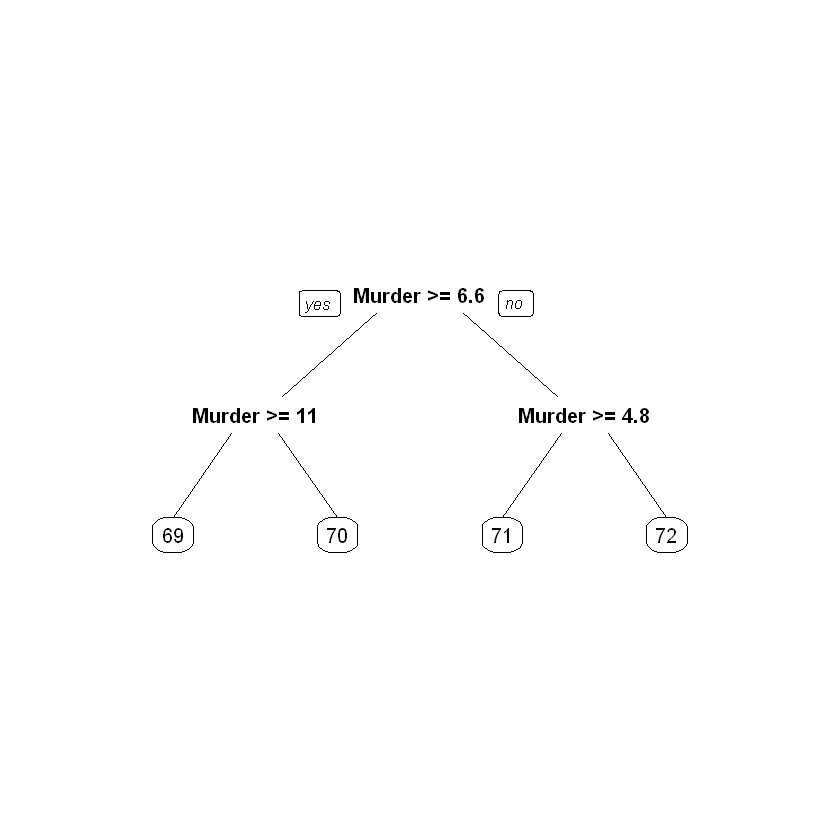

In [11]:
# Classification and Regression Trees (CART)
tree = rpart(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata)

# options(repr.plot.width=7, repr.plot.height=7)

# Plot Tree
prp(tree)

Answer: Murder

### Problem 2.2 - CART Models
Use the regression tree you just built to predict life expectancies (using the predict function), and calculate the sum-of-squared-errors (SSE) like you did for linear regression. What is the SSE?

In [12]:
# Make Predictions
pred3 = predict(tree)

# Sum of Squared Errors
sse3 = sum((pred3 - statedata$Life.Exp)^2)
round(sse3,4)

[1] 28.9985

### Problem 2.3 - CART Models
The error is higher than for the linear regression models. One reason might be that we haven't made the tree big enough. Set the minbucket parameter to 5, and recreate the tree.

Which variables appear in this new tree?

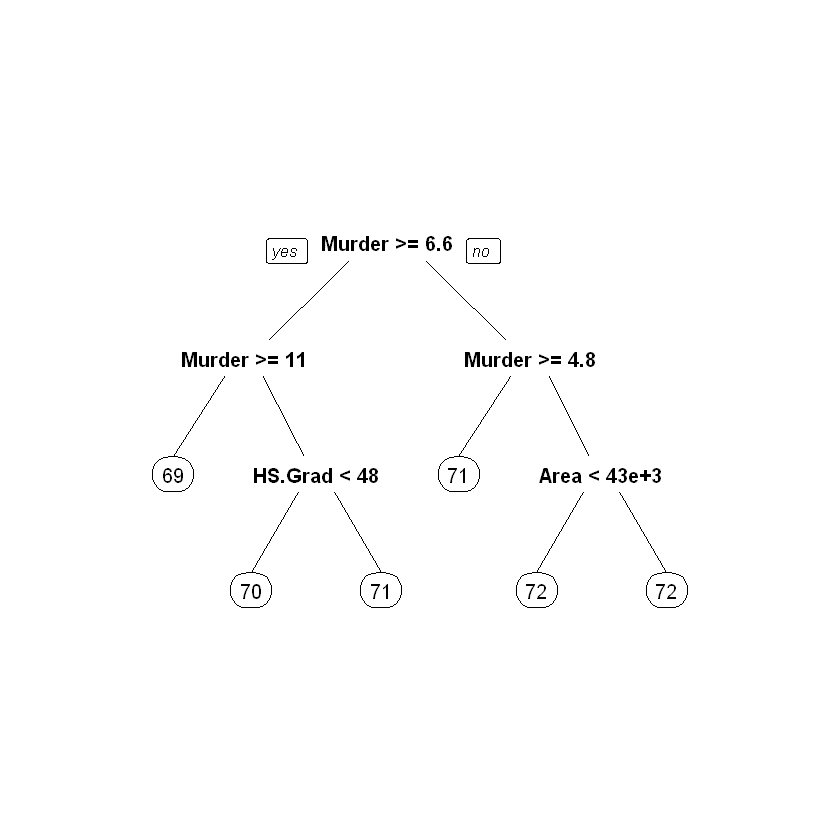

In [13]:
# Classification and Regression Trees (CART) with minbucket = 5
tree2 = rpart(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata, minbucket=5)

# options(repr.plot.width=7, repr.plot.height=7)

# Plot Tree
prp(tree2)

Answer: Murder, HS.Grad, Area.

### Problem 2.4 - CART Models
Do you think the default minbucket parameter is smaller or larger than 5 based on the tree that was built?

Answer:  If you set a minibucket value, say 3, then it would mean that every leaf node would have at least 3 observations in that bucket (more leafs than 5). Less value in the minibucket, more leafs, more value in the minibucket, less leafs. For sure, the default minibucket parameter are **larger** than 5. 

### Problem 2.5 - CART Models
What is the SSE of this tree?

In [14]:
# Make Predictions
pred4 = predict(tree2)

# Sum of Squared Errors
sse4 = sum((pred4 - statedata$Life.Exp)^2)
round(sse4,4)

[1] 23.6428

This is much closer to the linear regression model's error. By changing the parameters we have improved the fit of our model.

### Problem 2.6 - CART Models
Can we do even better? Create a tree that predicts Life.Exp using only Area, with the minbucket parameter to 1. What is the SSE of this newest tree?

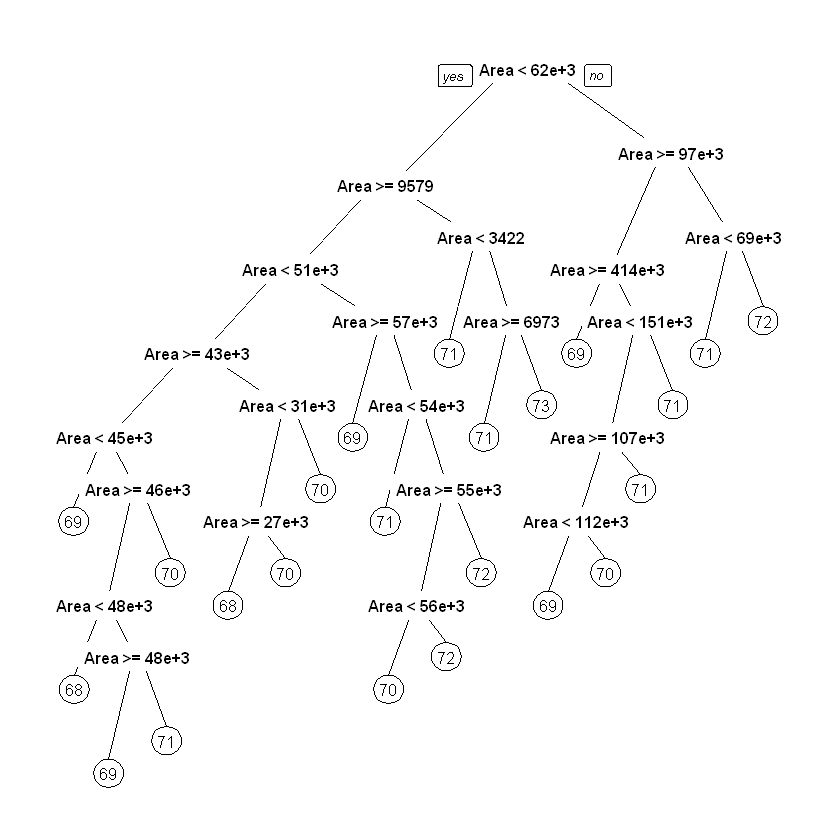

In [15]:
# Classification and Regression Trees (CART), using only Area and with minbucket = 1
tree3 = rpart(Life.Exp ~ Area, data=statedata, minbucket=1)

# Plot Tree
prp(tree3)

In [16]:
# Make Predictions
pred5 = predict(tree3)

# Sum of Squared Errors
sse5 = sum((pred5 - statedata$Life.Exp)^2)
round(sse5,4)

[1] 9.3124

### Problem 2.7 - CART Models
This is the lowest error we have seen so far. What would be the best interpretation of this result?

Answer: Overfiting

### Problem 3.1 - Cross-validation
Adjusting the variables included in a linear regression model is a form of model tuning. In Problem 1 we showed that by removing variables in our linear regression model (tuning the model), we were able to maintain the fit of the model while using a simpler model. A rule of thumb is that simpler models are more interpretable and generalizeable. We will now tune our regression tree to see if we can improve the fit of our tree while keeping it as simple as possible.

Load the caret library, and set the seed to 111. Set up the controls exactly like we did in the lecture (10-fold cross-validation) with cp varying over the range 0.01 to 0.50 in increments of 0.01. Use the train function to determine the best cp value for a CART model using all of the available independent variables, and the entire dataset statedata. What value of cp does the train function recommend? (Remember that the train function tells you to pick the largest value of cp with the lowest error when there are ties, and explains this at the bottom of the output.)

In [17]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [18]:
# To found Complexity Parameter

set.seed(111)

tr.control = trainControl(method='cv', number=10)

cp.grid = expand.grid(.cp=seq(0.01, 0.50, 0.01))

train(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, 
      data=statedata, method='rpart', trControl=tr.control, tuneGrid=cp.grid)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

50 samples
 7 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 44, 45, 45, 46, 44, 45, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared   MAE      
  0.01  1.042909  0.5206939  0.8299237
  0.02  1.042909  0.5206939  0.8299237
  0.03  1.027748  0.5338091  0.8173654
  0.04  1.032567  0.5338091  0.8173654
  0.05  1.032567  0.5338091  0.8173654
  0.06  1.033866  0.5206565  0.8320776
  0.07  1.029830  0.5285854  0.8252412
  0.08  1.029830  0.5285854  0.8252412
  0.09  1.029830  0.5285854  0.8252412
  0.10  1.005814  0.5512315  0.8079269
  0.11  1.005814  0.5512315  0.8079269
  0.12  1.005814  0.5512315  0.8079269
  0.13  1.032234  0.5238042  0.8262453
  0.14  1.083214  0.5041955  0.8725504
  0.15  1.106834  0.4822947  0.9050228
  0.16  1.138118  0.4775423  0.9422217
  0.17  1.174001  0.4287787  0.9676503
  0.18  1.192122  0.3990629  0.9942598
  0.19  1.192122  0.3990629  0.9942598
  0.20  1.192122  0.3990629  0.

Answer: Recomended cp = 0.12

### Problem 3.2 - Cross-Validation
Create a tree with the value of cp you found in the previous problem, all of the available independent variables, and the entire dataset "statedata" as the training data. Then plot the tree. You'll notice that this is actually quite similar to the first tree we created with the initial model. Interpret the tree: we predict the life expectancy to be 70 if the murder rate is greater than or equal to ... and is less than...

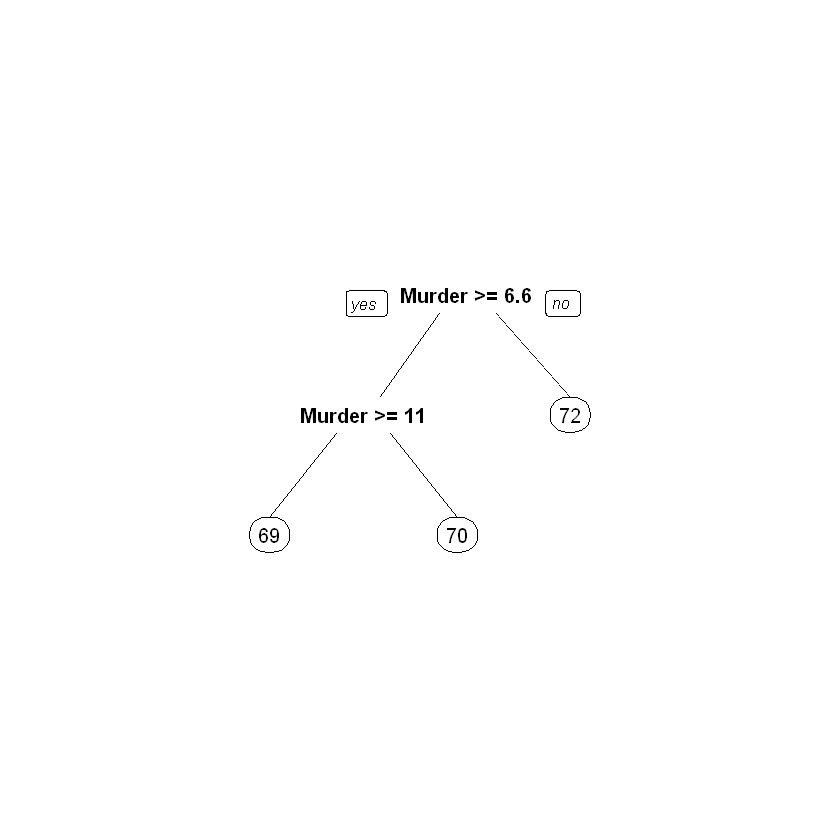

In [19]:
# Classification and Regression Trees (CART), with Complexity Parameter = 0.12
tree4 = rpart(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata, cp=0.12)

#options(repr.plot.width=7, repr.plot.height=7)

# Plot Tree
prp(tree4)

Answer:  We predict the life expectancy to be 70 if the murder rate is greater than or equal to 6.6 and is less than 11.

### Problem 3.3 - Cross-Validation
Calculate the SSE of this tree:

In [20]:
# Make Predictions
pred6 = predict(tree4)

# Sum of Squared Errors
sse6 = sum((pred6 - statedata$Life.Exp)^2)
round(sse6,4)

[1] 32.8655

### Problem 3.4 - Cross-Validation
Recall the first tree (default parameters), second tree (minbucket = 5), and the third tree (selected with cross validation) we made. Given what you have learned about cross-validation, which of the three models would you expect to be better if we did use it for prediction on a test set? For this question, suppose we had actually set aside a few observations (states) in a test set, and we want to make predictions on those states.

In [21]:
# Classification and Regression Trees (CART)
# tree = rpart(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata)
t1 = round(sse3,4)
paste("Sum of Squared Errors for Tree1:",t1)

# Classification and Regression Trees (CART) with minbucket = 5
# tree2 = rpart(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata, minbucket=5)
t2 = round(sse4,4)
paste("Sum of Squared Errors for Tree2:",t2)

# Classification and Regression Trees (CART), with Complexity Parameter = 0.12
# tree4 = rpart(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata, cp=0.12)
t3 = round(sse6,4)
paste("Sum of Squared Errors for Tree3:",t3)

[1] "Sum of Squared Errors for Tree1: 28.9985"

[1] "Sum of Squared Errors for Tree2: 23.6428"

[1] "Sum of Squared Errors for Tree3: 32.8655"

### Problem 3.5 - Cross-Validation
At the end of Problem 2 we made a very complex tree using just Area. Use train with the same parameters as before but just using Area as an independent variable to find the best cp value (set the seed to 111 first). Then build a new tree using just Area and this value of cp.

How many splits does the tree have?

In [22]:
# Found Complexity Parameter for a Tree with only Area

set.seed(111)

train(Life.Exp ~ Area, data = statedata, method = "rpart", trControl = tr.control, tuneGrid = cp.grid)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

50 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 44, 45, 45, 46, 44, 45, ... 
Resampling results across tuning parameters:

  cp    RMSE      Rsquared     MAE     
  0.01  1.285085  0.242889993  1.068979
  0.02  1.297420  0.227958081  1.077964
  0.03  1.297420  0.227958081  1.077964
  0.04  1.297420  0.227958081  1.077964
  0.05  1.297420  0.227958081  1.077964
  0.06  1.283241  0.255224868  1.071996
  0.07  1.283241  0.255224868  1.071996
  0.08  1.277535  0.253025061  1.054684
  0.09  1.286127  0.239816630  1.060619
  0.10  1.286127  0.239816630  1.060619
  0.11  1.286127  0.239816630  1.060619
  0.12  1.278550  0.239816630  1.060619
  0.13  1.336117  0.205007172  1.116064
  0.14  1.364618  0.132092640  1.125916
  0.15  1.364016  0.272311296  1.124202
  0.16  1.348422  0.216040174  1.128918
  0.17  1.365452  0.125811897  1.110581
  0.18  1.334937  0.006222148  1.103295
  0.19  1.328891          NaN  1.099663
  0.20  1.3

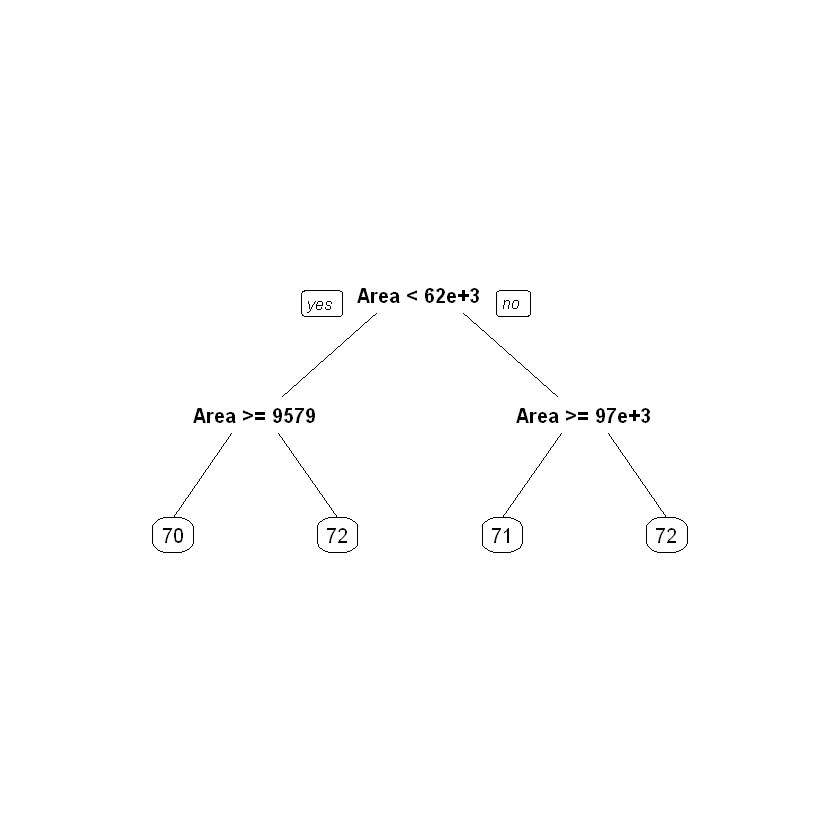

In [23]:
# New Tree using only Area and 
tree5 = rpart(Life.Exp ~ Area, data = statedata,cp=0.08)

# Plot Tree5
prp(tree5)

Answer: 3 splits

### Problem 3.6 - Cross-Validation
The lower left leaf (or bucket) corresponds to the lowest predicted Life.Exp of 70. Observations in this leaf correspond to states with area greater than or equal to ... and area less than ...

Answer: We predict the life expectancy to be 70 if the Area is greater than 9579.

### Problem 3.7 - Cross-Validation
We have simplified the previous "Area tree" considerably by using cross-validation. Calculate the SSE of the cross-validated "Area tree".

In [24]:
# Make Predictions
pred7 = predict(tree5)

# Sum of Squared Errors
sse7 = sum((pred7 - statedata$Life.Exp)^2)
round(sse7,4)

[1] 49.7121